# Principal Component Analysis

Let's get to the most important parts of the data

> we allways centeralize our data ==> mean=zero

All PCA tries to get the maximum variance. A line could be a vector and it is called eagen vector 

### A different view

PCA finds a low-dimensional representation of a data set that contains as much as possible of the variation.

## Starting Off

Currently when you have a lot of potential features to use in a model, how are you deciding which features to use in your final model, both the number and the specific features?

What are some advantages and disadvantages of this approach?

And how on earth do you handle mutli-colinearity in a dataset?

### Outcomes for today:
- Review components of PCA and its role in modeling
- Go through three demos - random data, small dataset, data image processing
- Pick the relevant components to keep
- Go through the lin-algebra method together if you all want


[Let's demo a concept with this first](https://www.desmos.com/calculator/tpahiv1skb)

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data.

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.



Glass dataset link for later :)  https://raw.githubusercontent.com/p-sama/Glass-Classification/master/glass.csv

In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## Effect of scaling on the data

- we don't want to give unscaled variance. we should give equal chance
- we gain computitional power by scaling 

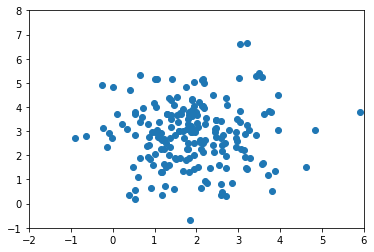

In [4]:

np.random.seed(11013119)

x_1 = np.random.normal(2,1,200)

x_2 = np.random.normal(3,1.5, 200)

plt.xlim((-2,6))
plt.ylim((-1,8))
plt.scatter(x_1, x_2);

1.865174681370263e-16
9.325873406851315e-17


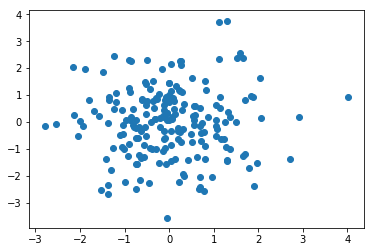

In [6]:
x1_mean = np.mean(x_1)
print(x1_mean)
x2_mean = np.mean(x_2)
print(x2_mean)

## Centralization of the data
x_1 = x_1 - x1_mean
# print(x_1)
x_2 = x_2 - x2_mean
# print(x_2)

plt.scatter(x_1, x_2);

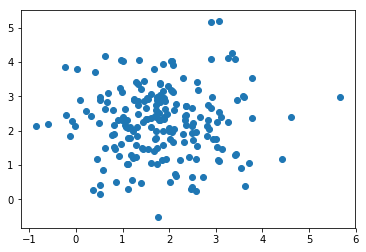

In [7]:
## Now let see what might happen 
## if we scale the data with the variance of features
np.random.seed(11013119)

x_1 = np.random.normal(2,1,200)

x_2 = np.random.normal(3,1.5, 200)

x_1 = x_1 - x1_mean

x_1 = x_1/(x_1.std())

x_2 = x_2 - x2_mean

x_2 = x_2/(x_2.std())

plt.scatter(x_1, x_2);

### Normalization

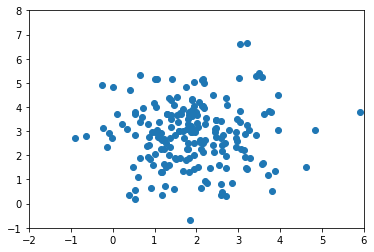

In [8]:
## Let's create the data again 

np.random.seed(11013119)

x_1 = np.random.normal(2,1,200)

x_2 = np.random.normal(3,1.5, 200)

plt.xlim((-2,6))
plt.ylim((-1,8))
plt.scatter(x_1, x_2);

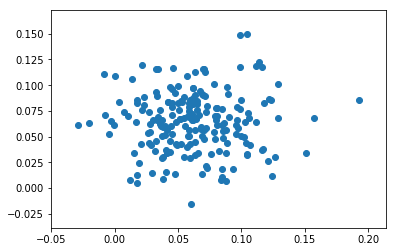

In [9]:
## sklearn normalize is basically divides the 
## features with respect to their norm

x_1 = x_1/np.linalg.norm(x_1)

x_2 = x_2/np.linalg.norm(x_2)

plt.scatter(x_1, x_2);

Exc: You might want to try this with minmax scale too.

**for PCA ==> use standard scaller** to get a fare game between the features 

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for **dimensionality reduction** in data.
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

Ortogonal direction

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

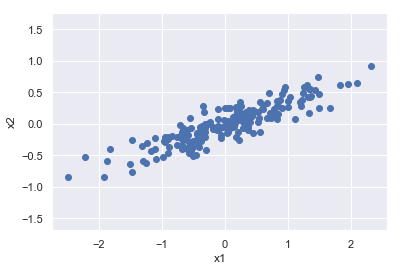

In [58]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the $x_1$ and $x_2$ variables.
The problem setting here is slightly different: __we are not trying to predict $x_2$ from $x_1$__ as they are both predictor variables. 

The idea is instead of using two variables we will record this data with __just one__ variable which will be combination of $x_1$ and $x_2$.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # this doesn't do dimension reduction
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [60]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [61]:
# they should be unit length 
0.94446029**2 + 0.32862557**2

1.0000000046447088

In [64]:
print(pca.explained_variance_)
len(pca.explained_variance_)

[0.7625315 0.0184779]


2

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

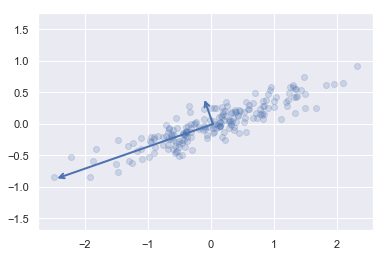

In [20]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='b',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)


This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

[Deep Dive on how the axes is determined](https://www.youtube.com/watch?v=_UVHneBUBW0)

[The linear algebra intuition behind this](https://www.youtube.com/watch?v=PFDu9oVAE-g)

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [23]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

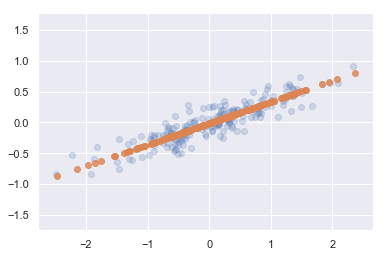

In [25]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# this means we cut the noice

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### Another view of what happened
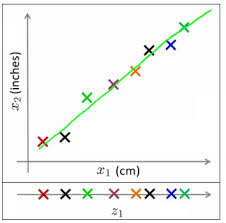

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data .

We start by loading the data:

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [27]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

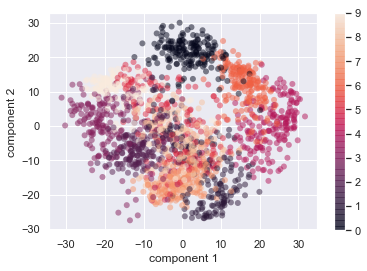

In [28]:
# this is the most common clusturing project 
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

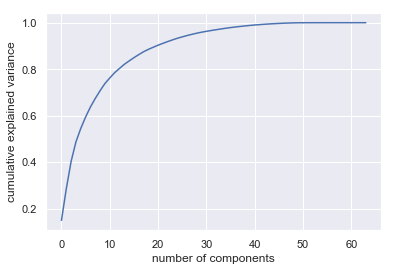

In [29]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

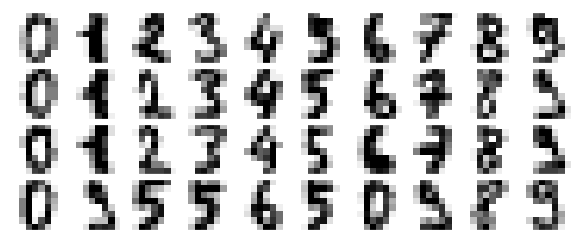

In [30]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

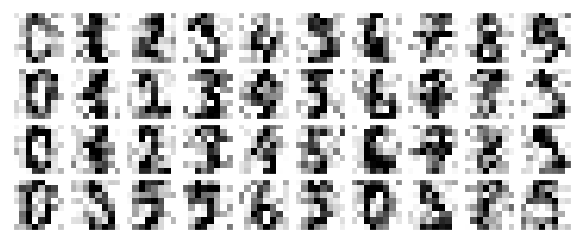

In [31]:
import numpy as np
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [42]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

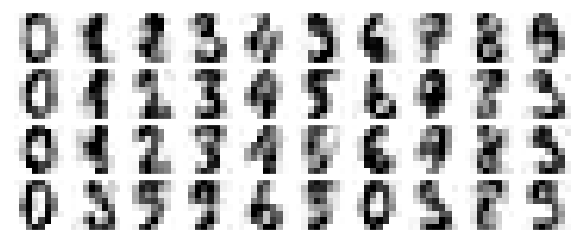

In [43]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Principal Component Analysis Summary

We have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term (see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)) that serves to enforce sparsity of the components.

In the following sections, we will look at other unsupervised learning methods that build on some of the ideas of PCA.

## <font color='darkred'>MATH - Further Reading<font>


#### Covariance for $X$ and $Y$
$$cov(X,Y) = \frac{\sum_i^n(X_i -\mu_X)(Y_i - \mu_Y)}{n-1}$$

#### Covariance for $N$ variables

$$C^{n x n} = (c_{i,j}, c_{i,j} = cov(Dim_i, Dim_j))$$

where $C^{m x n}$ is a matrix with $n$ rows and $n$ columns, and $Dim_x$ is the $i$th dimension.

In [44]:
import numpy as np
X = np.array([ [0.1, 0.3, 0.4, 0.8, 0.9],
               [3.2, 2.4, 2.4, 0.1, 5.5],
               [10., 8.2, 4.3, 2.6, 0.9]
             ])
print( np.cov(X) )

[[ 0.115   0.0575 -1.2325]
 [ 0.0575  3.757  -0.8775]
 [-1.2325 -0.8775 14.525 ]]


In [45]:
print(np.var(X, axis=1, ddof=1))

[ 0.115  3.757 14.525]


Eigendecomposition
The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that you want to find a product of matrices that is equal to the initial matrix. In the case of the eigendecomposition, you decompose the initial matrix into the product of its eigenvectors and eigenvalues.

A vector $v$ is an eigenvector of a square matrix $A$ if it satisfies the following equation:

$$Av = \lambda v$$.

Here, lambda ($\lambda$) is the represents the eigenvalue scalar.

A matrix can have one eigenvector and eigenvalue for each dimension of the parent matrix.

Also , remember that not all square matrices can be decomposed into eigenvectors and eigenvalues, and some can only be decomposed in a way that requires complex numbers. The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.

$$A = Q . diag(V) . Q^{-1}$$

$Q$ is a matrix comprised of the eigenvectors, $diag(V)$ is a diagonal matrix comprised of the eigenvalues along the diagonal, and $Q^-1$ is the inverse of the matrix comprised of the eigenvectors.

A decomposition operation breaks down a matrix into constituent parts to make certain operations on the matrix easier to perform. Eigendecomposition is used as an element to simplify the calculation of other more complex matrix operations.



In [46]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# calculate eigendecomposition
values, vectors = eig(A)
print(values)
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 1.61168440e+01 -1.11684397e+00 -9.75918483e-16]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


## Best math example so far

In [47]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [48]:
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)

[3. 4.]


In [49]:
# center columns by subtracting column means
C = A - M
print(C)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


In [50]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


In [51]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]


In [52]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]
